## Prediction of air pollution index.
    Challenge Date & Time: Mar 24, 2020, 07:30 AM IST - Apr 23, 2020, 07:30 AM IST

#### Public Leader board position is 24th/132 submissions. (Name - Bala Iyappa)

Link for leaderboard- https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-air-pollution-index-prediction/leaderboard/predict-air-pollution-index-dbb01eb6/

### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import date, datetime
import datetime as dt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from time import time
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split,ShuffleSplit,cross_val_predict,KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

In [2]:
#set global configurations
pd.options.display.max_columns=None

In [3]:
# Import data
df = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/Earth/dataset/train_m.csv',header=0)

In [4]:
df.head()

date_time is_holiday  humidity  wind_speed  wind_direction  \
0   10/2/2012 9:00       None        89           2             329   
1  10/2/2012 10:00       None        67           3             330   
2  10/2/2012 11:00       None        66           3             329   
3  10/2/2012 12:00       None        66           3             329   
4  10/2/2012 13:00       None        65           3             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all weather_type  traffic_volume  air_pollution_index  
0          40       Clouds            5545                  121  
1          75       Clouds            4516                  178  
2          90       Clouds            4767                  113  
3          90       Clouds            5026                   20  
4          75       Clouds            4918                  281

In [5]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

### Feature Extration

In [6]:
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['dayofyear'] = df['date_time'].dt.dayofyear
#df['weekofyear'] = df['date_time'].dt.weekofyear

df['month'] = pd.DatetimeIndex(df['date_time']).month



#df['weekday'] = df['date_time'].dt.day_name()
df['dayofweek'] = df['date_time'].dt.dayofweek


df['Time'] = pd.to_datetime(df['date_time']).dt.time


In [7]:
#df['date_time'] = pd.to_datetime(df['date_time'], format='%y-%m-%d %H:%M:%S')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 19 columns):
date_time              33750 non-null datetime64[ns]
is_holiday             33750 non-null object
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
traffic_volume         33750 non-null int64
air_pollution_index    33750 non-null int64
year                   33750 non-null int64
dayofyear              33750 non-null int64
month                  33750 non-null int64
dayofweek              33750 non-null int64
Time                   33750 non-null object
dtypes: datetime64[ns](1), float64(3)

In [9]:
#df=df.drop('date_time',axis=1)

In [10]:
#df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
#df['date_time'] = pd.to_numeric(df['date_time'], errors='coerce')

### Data Preprocessing

In [12]:
df.set_index('date_time', inplace=True)

In [13]:
print ('shape before drop :' , df.shape)
df=df.drop_duplicates()
print ('Shape after drop :', df.shape)

shape before drop : (33750, 18)
Shape after drop : (33750, 18)


In [14]:
data_obj=df.select_dtypes(include='object')
data_num=df.select_dtypes(include= ['int64','float64'])


In [15]:
data_obj.describe()

is_holiday weather_type      Time
count       33750        33750     33750
unique         12           11        24
top          None       Clouds  04:00:00
freq        33707        11213      1471

In [16]:
odr = OrdinalEncoder()
data_obj[:] = odr.fit_transform(data_obj[:])

In [17]:
#data_bool = data_bool.replace(replace_map)

In [18]:
data_1 = pd.concat([data_num, data_obj], axis=1)

In [19]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 18 columns):
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
traffic_volume         33750 non-null int64
air_pollution_index    33750 non-null int64
year                   33750 non-null int64
dayofyear              33750 non-null int64
month                  33750 non-null int64
dayofweek              33750 non-null int64
is_holiday             33750 non-null int64
weather_type           33750 non-null int64
Time                   33750 non-null int64
dtypes: float64(3), int64(15)
memory usage: 4.9 MB


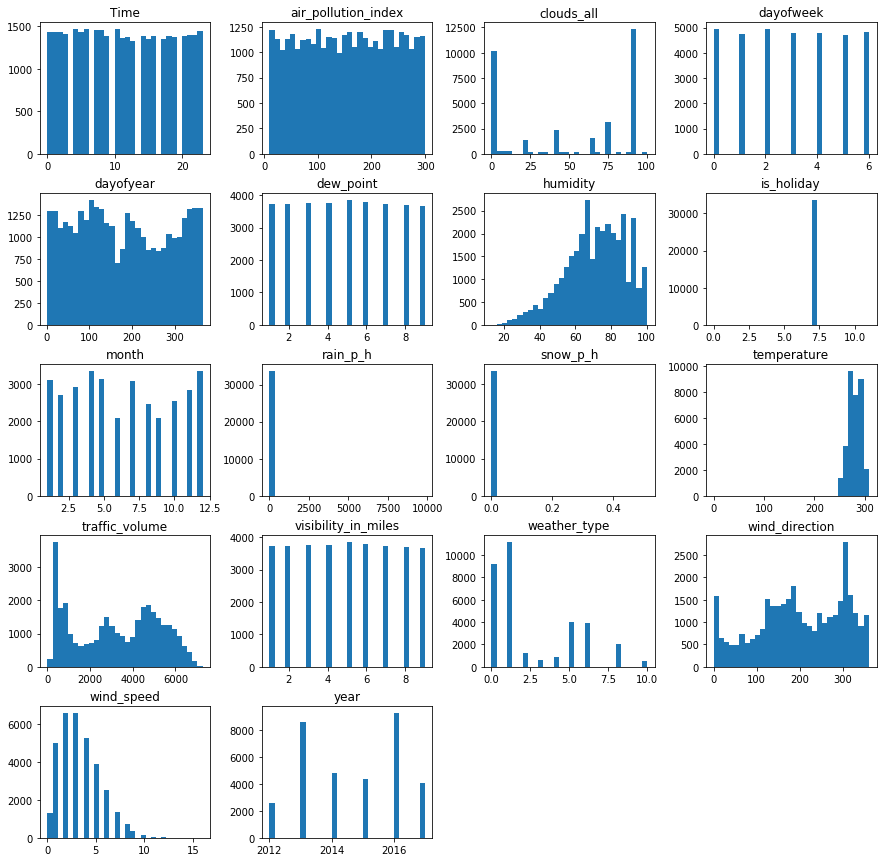

In [20]:
data_1.hist(bins=30,figsize=(15,15),grid=False)
plt.show()

In [21]:
corr_matrix = data_1.corr()
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

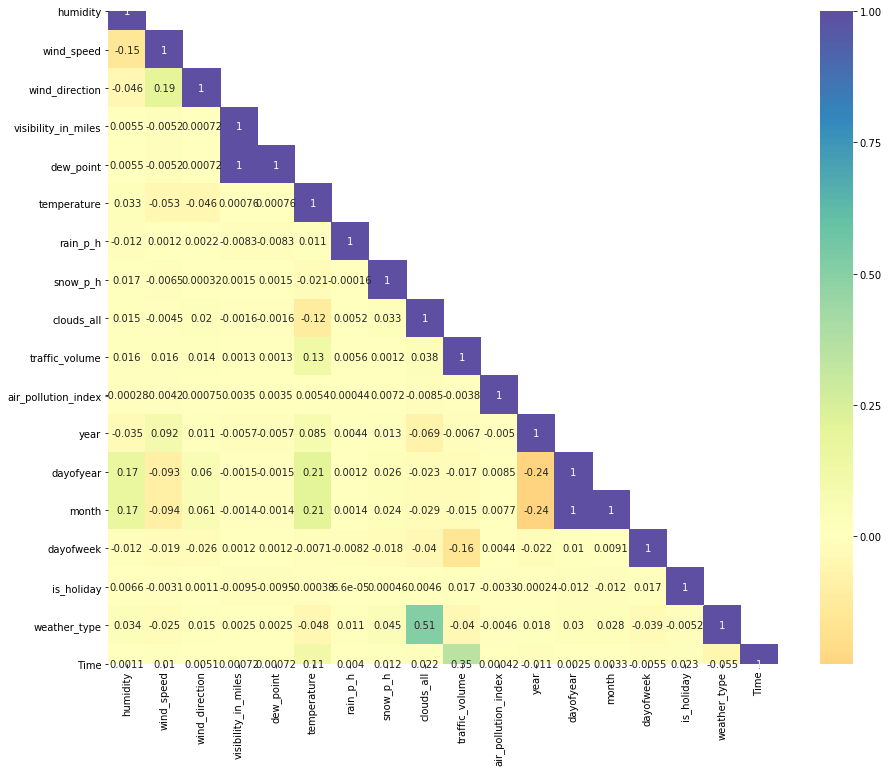

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, center=0, cmap="Spectral")

In [23]:
corr_matrix['air_pollution_index'].sort_values(ascending=False)

air_pollution_index    1.000000
dayofyear              0.008510
month                  0.007733
dayofweek              0.004411
Time                   0.000424
is_holiday            -0.003300
weather_type          -0.004624
year                  -0.004981
humidity                    NaN
wind_speed                  NaN
wind_direction              NaN
visibility_in_miles         NaN
dew_point                   NaN
temperature                 NaN
rain_p_h                    NaN
snow_p_h                    NaN
clouds_all                  NaN
traffic_volume              NaN
Name: air_pollution_index, dtype: float64

In [24]:
data_1=data_1.drop(['snow_p_h','rain_p_h','dew_point','wind_direction','is_holiday','wind_speed','clouds_all'],axis = 1)

### Data Modelling

In [25]:
# Split dataset into train and test set
X = data_1.iloc[:, :-1].values
y = data_1.iloc[:, -1].values
#X = data_1.drop('air_pollution_index',axis=1)
#y = 'air_pollution_index'


In [26]:
scaler = MinMaxScaler()
data_1 = scaler.fit_transform(data_1)
data_1 = pd.DataFrame(data_1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state= 50)

In [28]:
print('X Train' , X_train.shape)
print('X Test' , X_test.shape)
print('y Train' , y_train.shape)
print('y Test' , y_test.shape)

X Train (20250, 10)
X Test (13500, 10)
y Train (20250,)
y Test (13500,)


In [29]:
estimator=RandomForestRegressor()
estimator.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [30]:
# Predict on the test data
ypred = estimator.predict(X_test)

In [31]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': ypred})

In [32]:
df1

Actual  Predicted
0          16       15.0
1           1        2.2
2          20       15.8
3          17       11.1
4           9       12.4
...       ...        ...
13495       0        9.3
13496      15        9.8
13497       4        2.8
13498      17       16.1
13499      10       11.4

[13500 rows x 2 columns]

### Visualization of the Predictions

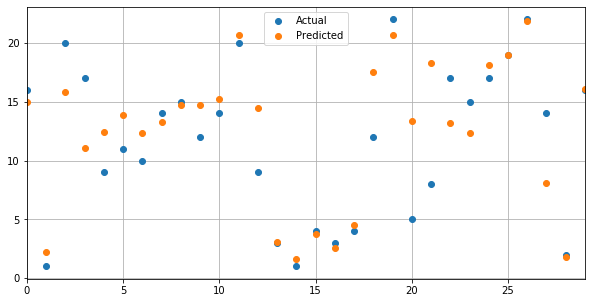

In [33]:
df1[:30].plot(y=['Actual','Predicted'], figsize=(10,5), grid=True, style = 'o')

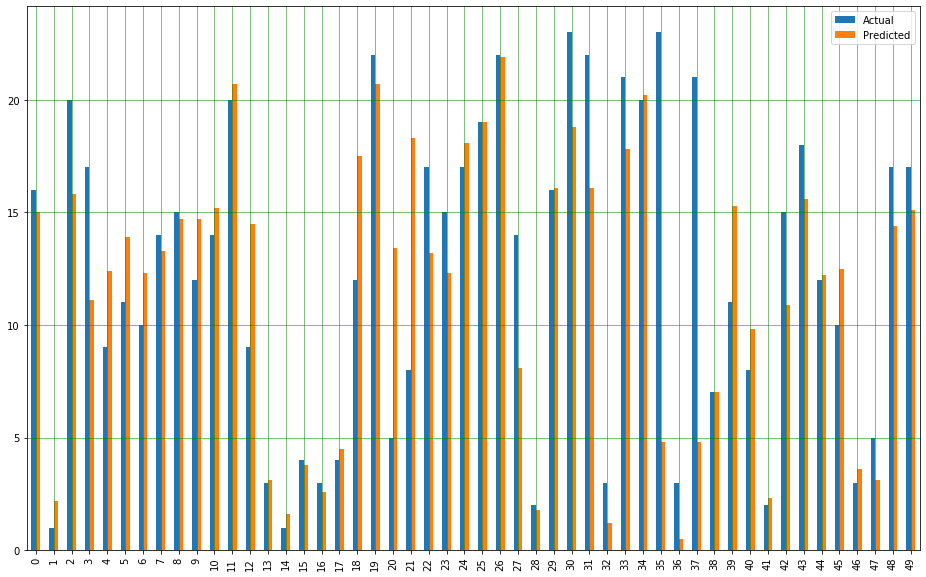

In [34]:
df2 = df1.head(50)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [35]:
print ('Score:', estimator.score(X_test, y_test))

Score: 0.6559245120683405


In [36]:
# Compute the root-mean-square
from sklearn import metrics
print('Mean_Absolute_Error   :', metrics.mean_absolute_error(y_test,ypred))
print('Mean_Square_error     :' , metrics.mean_squared_error(y_test,ypred))
print('Root_Mean_Squre_Error :',np.sqrt(mean_squared_error(y_test,ypred)))

Mean_Absolute_Error   : 2.7465851851851855
Mean_Square_error     : 16.461682222222223
Root_Mean_Squre_Error : 4.057299868412763


In [37]:
scores = cross_val_score(estimator, X, y, cv=4)
print("scores = " + str(scores))

scores = [0.59020619 0.60508316 0.5968135  0.57653898]


In [38]:
accuracy = estimator.score(X_test,y_test)
print(accuracy*100,'%')

65.59245120683404 %


In [39]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error -0.592160


### Test data handeling

In [ ]:
test = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/Earth/dataset/test.csv')

In [ ]:
test['date_time'] = pd.to_datetime(test['date_time'], errors='coerce')

In [ ]:
test['year'] = pd.DatetimeIndex(test['date_time']).year
test['dayofyear'] = test['date_time'].dt.dayofyear


test['month'] = pd.DatetimeIndex(test['date_time']).month


#test['weekday'] = test['date_time'].dt.day_name()
test['dayofweek'] = test['date_time'].dt.dayofweek


test['Time'] = pd.to_datetime(test['date_time']).dt.time

In [ ]:
test_data_obj=test.select_dtypes(include='object')
test_data_num=test.select_dtypes(include= ['int64','float64'])

In [ ]:
odr = OrdinalEncoder()
test_data_obj[:] = odr.fit_transform(test_data_obj[:])

In [ ]:
test_data_1 = pd.concat([test_data_num, test_data_obj], axis=1)

In [ ]:
test_data_1.info()

In [ ]:
test_data_1=test_data_1.drop(['snow_p_h','rain_p_h','dew_point','wind_direction','is_holiday','wind_speed','clouds_all'],axis = 1)

In [ ]:
#test['date_time'] = pd.to_numeric(test['date_time'], errors='coerce')

In [ ]:
test_predictions = estimator.predict(test_data_1)

In [ ]:
date_time = test['date_time']

In [ ]:
submission_df_1 = pd.DataFrame({
                  "date_time": date_time, 
                  "air_pollution_index": test_predictions})

In [ ]:
submission_df_1.to_csv('submission_2(rfr).csv', index=False)